# Load Dataset

In [ ]:
# 📚 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sonir99","key":"9f90ee1a53063d301f7118ba036d6037"}'}

In [ ]:
# Move the API key to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 📥 Download the dataset (Edge-IIoTset Cyber Security Dataset)
!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot

# 📦 Unzip the downloaded file
!unzip edgeiiotset-cyber-security-dataset-of-iot-iiot.zip

Dataset URL: https://www.kaggle.com/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot
License(s): CC-BY-NC-SA-4.0
Archive:  edgeiiotset-cyber-security-dataset-of-iot-iiot.zip
  inflating: Edge-IIoTset dataset/Attack traffic/Backdoor_attack.csv  
  inflating: Edge-IIoTset dataset/Attack traffic/Backdoor_attack.pcap  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS HTTP Flood Attacks.pcap  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS ICMP Flood Attacks.pcap  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS TCP SYN Flood Attacks.pcap  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS UDP Flood Attacks.pcap  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS_HTTP_Flood_attack.csv  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv  
  inflating: Edge-IIoTset dataset/Attack traffic/DDoS_UDP_Flood_attack.csv  
  inflating: Edge-IIo

In [ ]:
# Load the preprocessed ML dataset
data = pd.read_csv('Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv')

# Check shape and preview
print("Shape of dataset:", df.shape)
data.head()

Shape of dataset: (157800, 63)


<ipython-input-7-a7ceb5857e1a>:2: DtypeWarning: Columns (3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv')


,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


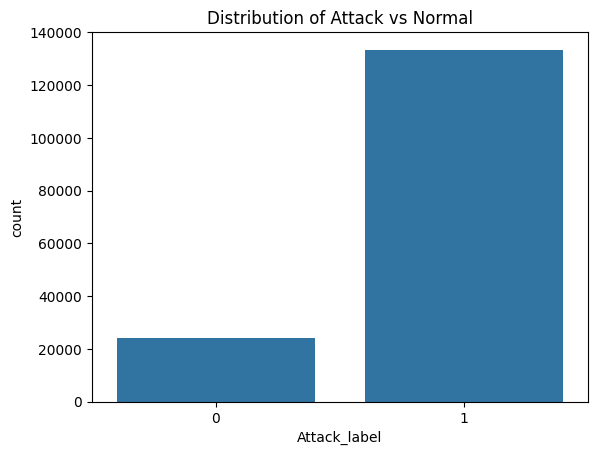

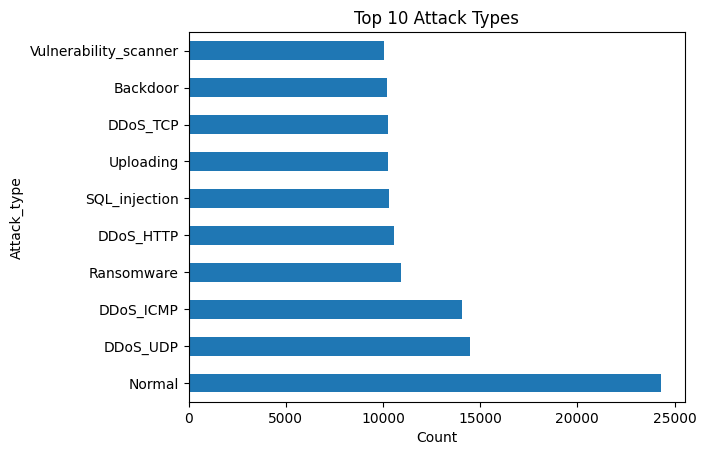

In [ ]:
# Plot attack label distribution
sns.countplot(x='Attack_label', data=df)
plt.title('Distribution of Attack vs Normal')
plt.show()

# Plot top attack types
top_attacks = df['Attack_type'].value_counts().head(10)
top_attacks.plot(kind='barh', title='Top 10 Attack Types')
plt.xlabel("Count")
plt.show()

# Data Preprocessing

In [ ]:
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64


In [ ]:
# Drop rows with missing values (or you can fillna if needed)
data.dropna(inplace=True)
print("\nShape after dropping missing values:", data.shape)


Shape after dropping missing values: (157800, 63)


# Encode Labels

In [ ]:
# 🏷️ Encode the Labels (if not already encoded)
if data['Attack_type'].dtype == 'object':
    le = LabelEncoder()
    data['Attack_type'] = le.fit_transform(data['Attack_type'])

# Feature Selection

In [ ]:
# Separate features and target
X = data.drop('Attack_type', axis=1)
y = data['Attack_type']

# Keep only numeric columns in X
X = X.select_dtypes(include=[np.number])

print("\nFeatures after dropping non-numeric columns:", X.columns.tolist())



Features after dropping non-numeric columns: ['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.content_length', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.topic_len', 'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label']


In [ ]:
# 📏 Feature Scaling
# Scale only numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Model Training and Evaluation

In [ ]:
#RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2982
           1       0.80      0.78      0.79      3173
           2       1.00      1.00      1.00      4258
           3       1.00      1.00      1.00      2996
           4       1.00      1.00      1.00      4349
           5       1.00      0.77      0.87       300
           6       0.41      1.00      0.58       386
           7       1.00      1.00      1.00      7380
           8       0.81      0.82      0.81      3018
           9       0.92      0.96      0.94      3051
          10       0.97      0.86      0.91      3171
          11       0.80      0.83      0.81      3116
          12       0.88      0.85      0.87      3067
          13       0.98      0.96      0.97      3022
          14       0.84      0.82      0.83      3071

    accuracy                           0.92     47340
   macro avg       0.89      0.91      0.89     47340
we

In [ ]:
#LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.45      0.74      0.56      2982
           1       0.41      0.52      0.46      3173
           2       1.00      0.99      1.00      4258
           3       0.88      0.90      0.89      2996
           4       1.00      0.99      0.99      4349
           5       0.80      0.55      0.65       300
           6       0.39      1.00      0.56       386
           7       1.00      1.00      1.00      7380
           8       0.36      0.17      0.23      3018
           9       0.83      0.95      0.88      3051
          10       0.33      0.37      0.35      3171
          11       0.27      0.45      0.34      3116
          12       0.50      0.07      0.13      3067
          13       0.79      0.78      0.79      3022
          14       0.24      0.09      0.13      3071

    accuracy                           0.67     47340
   macro avg       0.62      0.64      0.60     47

In [ ]:
#Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.54      0.71      0.61      2982
           1       0.39      0.59      0.47      3173
           2       0.97      1.00      0.98      4258
           3       0.83      0.89      0.86      2996
           4       1.00      0.97      0.98      4349
           5       0.96      0.31      0.46       300
           6       0.36      1.00      0.53       386
           7       1.00      1.00      1.00      7380
           8       0.68      0.11      0.19      3018
           9       0.84      0.90      0.87      3051
          10       0.45      0.50      0.48      3171
          11       0.40      0.44      0.42      3116
          12       0.65      0.09      0.16      3067
          13       0.87      0.76      0.81      3022
          14       0.36      0.52      0.42      3071

    accuracy                           0.70     47340
   macro avg       0.69      0.65      0.62     47340
weighted avg

# Visualizations

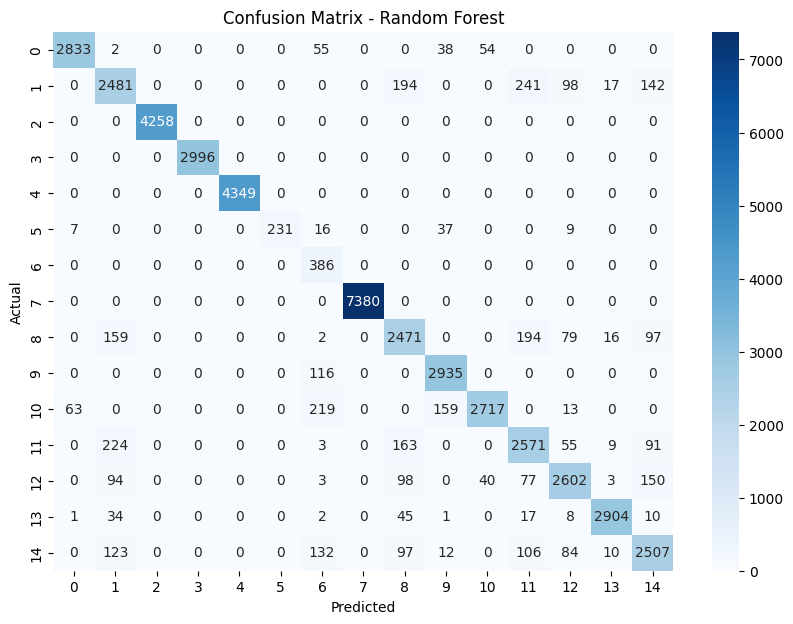

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
